In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches

from plot_info import ASSESSMENT_COLORS
import plot_info # Does this set the plot style ?

claims_df = pd.read_csv('preprocessed_data/claims_truncated_for_llm.csv')
major_claims_df = claims_df[claims_df['assertion_type'] == 'major_claim']

## Leading authors

- [ ] Historical-continuity
- [ ] Country
- [ ] US Ivy League
- [ ] Newcommer/experienced de la base de donnée ?
- [ ] Junior/Senior PI
- [ ] Unchallenged vs challenged Par author (also les)
- [ ] aussi + que 6 claims
- [ ] % challenged vs nb d'articles

### Data intake

In [12]:
df = pd.read_csv('preprocessed_data/LH_inner.csv')

assessment_columns = ['Unchallenged', 'Verified', 'Partially Verified', 'Mixed', 'Challenged']

for col in assessment_columns:
    df[f'{col}_prop'] = df[col] / df['Major claims']

# Let's also create a "reproducibility score" - higher means more verified claims
df['reproducibility_score'] = (df['Verified_prop'] * 2 + df['Partially Verified_prop'] - 
                                  df['Challenged_prop'] * 2 - df['Mixed_prop'] * 0.5)

df = df.sort_values(by="Challenged_prop", ascending=False).reset_index(drop=True)
df

,Name,Historical lab,Continuity,Sex,Articles,Major claims,Unchallenged,Verified,Partially Verified,Mixed,Challenged,Affiliation,Country,Ivy league,Unchallenged_prop,Verified_prop,Partially Verified_prop,Mixed_prop,Challenged_prop,reproducibility_score
0,Eldon ED,False,False,Female,1.0,3.0,0.0,0.0,0.0,0.0,3.0,University of Notre Dame,USA,0,0.00,0.000000,0.00,0.0,1.000000,-2.000000
1,Moore KJ,False,False,Female,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Harvard Medical School,USA,1,0.00,0.000000,0.00,0.0,1.000000,-2.000000
2,Nusse R,False,False,Male,2.0,6.0,0.0,2.0,0.0,0.0,4.0,Stanford University School of Medicine,USA,1,0.00,0.333333,0.00,0.0,0.666667,-0.666667
3,Johnson AD,False,False,Male,1.0,3.0,0.0,1.0,0.0,0.0,2.0,University of California,USA,0,0.00,0.333333,0.00,0.0,0.666667,-0.666667
4,Schmucker D,False,False,Male,1.0,2.0,0.0,0.0,1.0,0.0,1.0,Harvard Medical School,USA,1,0.00,0.000000,0.50,0.0,0.500000,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Dushay MS,True,True,Male,2.0,4.0,1.0,2.0,1.0,0.0,0.0,University of Stockholm,Sweden,0,0.25,0.500000,0.25,0.0,0.000000,1.250000
152,Wasserman SA,False,True,Male,2.0,5.0,0.0,5.0,0.0,0.0,0.0,University of San Diego,USA,0,0.00,1.000000,0.00,0.0,0.000000,2.000000
153,Söderhäll K,True,True,Male,2.0,5.0,1.0,4.0,0.0,0.0,0.0,University of Uppsala,Sweden,0,0.20,0.800000,0.00,0.0,0.000000,1.600000
154,Rahme LG,False,False,Female,3.0,5.0,1.0,4.0,0.0,0.0,0.0,Harvard Medical School and Massachusetts Gener...,USA,1,0.20,0.800000,0.00,0.0,0.000000,1.600000


(array([128.,   7.,   4.,   6.,   1.,   6.,   2.,   0.,   0.,   2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

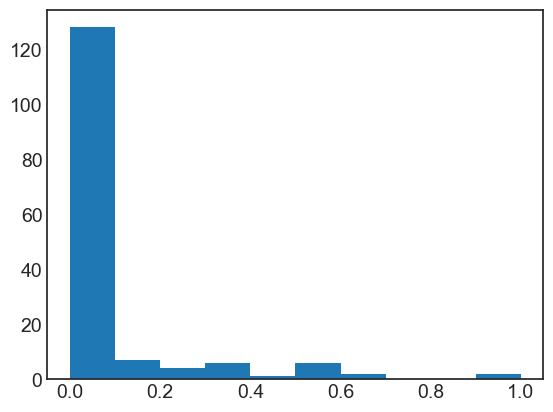

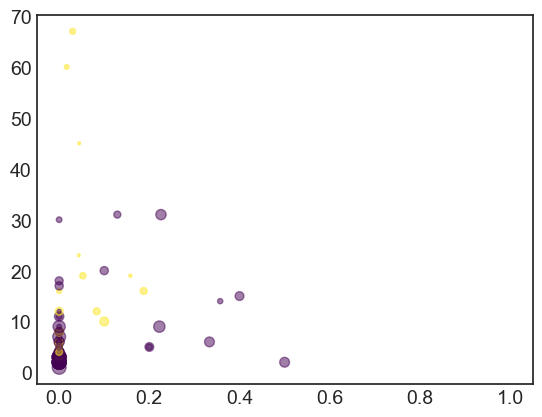

In [4]:
plt.scatter(df["Challenged_prop"], df["Major claims"], s=df["Unchallenged_prop"]*100, c=df["Historical lab"]+10*4, cmap='viridis', alpha=0.5)

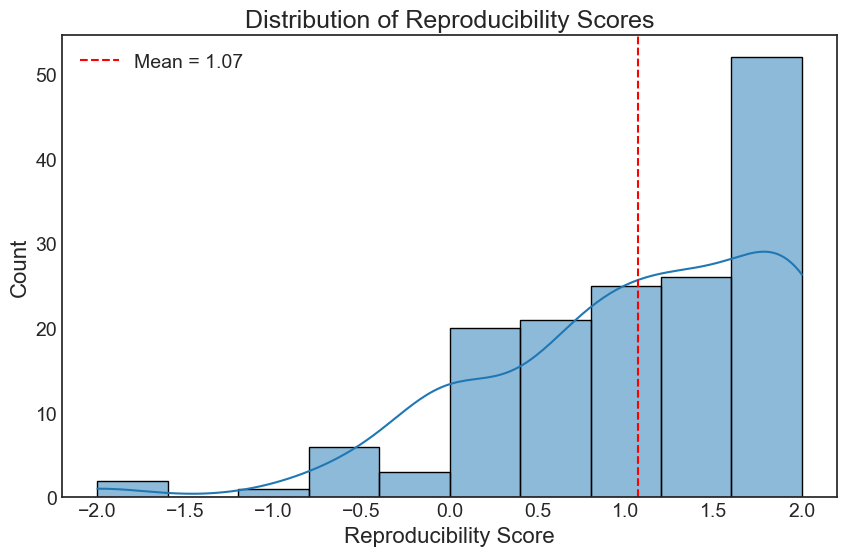

Descriptive Statistics:


,Unchallenged,Verified,Partially Verified,Mixed,Challenged,Unchallenged_prop,Verified_prop,Partially Verified_prop,Mixed_prop,Challenged_prop,reproducibility_score,Articles,Major claims
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,1.532051,3.910256,0.480769,0.076923,0.442308,0.275263,0.575450,0.065248,0.013642,0.070396,1.068536,2.557692,6.442308
std,2.304049,6.720572,0.973661,0.331924,1.096860,0.318085,0.337194,0.142035,0.064930,0.176316,0.842971,3.481269,9.161800
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,1.000000,1.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.666667,1.000000,2.000000
50%,1.000000,2.000000,0.000000,0.000000,0.000000,0.190909,0.625000,0.000000,0.000000,0.000000,1.213235,1.000000,3.000000
75%,2.000000,4.000000,1.000000,0.000000,0.000000,0.500000,0.878472,0.066667,0.000000,0.000000,1.802083,2.000000,6.000000
max,17.000000,47.000000,6.000000,2.000000,7.000000,1.000000,1.000000,1.000000,0.500000,1.000000,2.000000,28.000000,67.000000


In [5]:
# Let's examine the distribution of this score
plt.figure(figsize=(10, 6))
sns.histplot(df['reproducibility_score'], kde=True)
plt.title('Distribution of Reproducibility Scores')
plt.xlabel('Reproducibility Score')
plt.axvline(df['reproducibility_score'].mean(), color='red', linestyle='--', 
            label=f'Mean = {df["reproducibility_score"].mean():.2f}')
plt.legend()
plt.show()

# Basic descriptive statistics
descriptive_stats = df[assessment_columns + [col + '_prop' for col in assessment_columns] + 
                     ['reproducibility_score', 'Articles', 'Major claims']].describe()
print("Descriptive Statistics:")
descriptive_stats


### Binary Variables
- [ ] Historical-continuity
- [ ] US Ivy League
- [ ] Newcommer/experienced de la base de donnée ?
- [ ] Junior/Senior PI
- [ ] Unchallenged vs challenged Par author (also les)
- [ ] aussi + que 6 claims
- [ ] % challenged vs nb d'articles

In [ ]:
to_plot = df.copy()

In [22]:
variable = 'Historical lab'

# Group by historical lab status
var_grouped = df.groupby(variable).agg({
    **{col: 'sum' for col in assessment_columns},
    'Major claims': 'sum',
    'Articles': 'sum',
    'reproducibility_score': 'mean'
})

# Calculate proportions
for col in assessment_columns:
    var_grouped[f'{col}_prop'] = var_grouped[col] / var_grouped['Major claims']

var_grouped

,Unchallenged,Verified,Partially Verified,Mixed,Challenged,Major claims,Articles,reproducibility_score,Unchallenged_prop,Verified_prop,Partially Verified_prop,Mixed_prop,Challenged_prop
Historical lab,,,,,,,,,,,,,
False,179.0,319.0,42.0,11.0,52.0,603.0,244.0,0.972173,0.296849,0.529022,0.069652,0.018242,0.086235
True,60.0,291.0,33.0,1.0,17.0,402.0,155.0,1.427705,0.149254,0.723881,0.082090,0.002488,0.042289


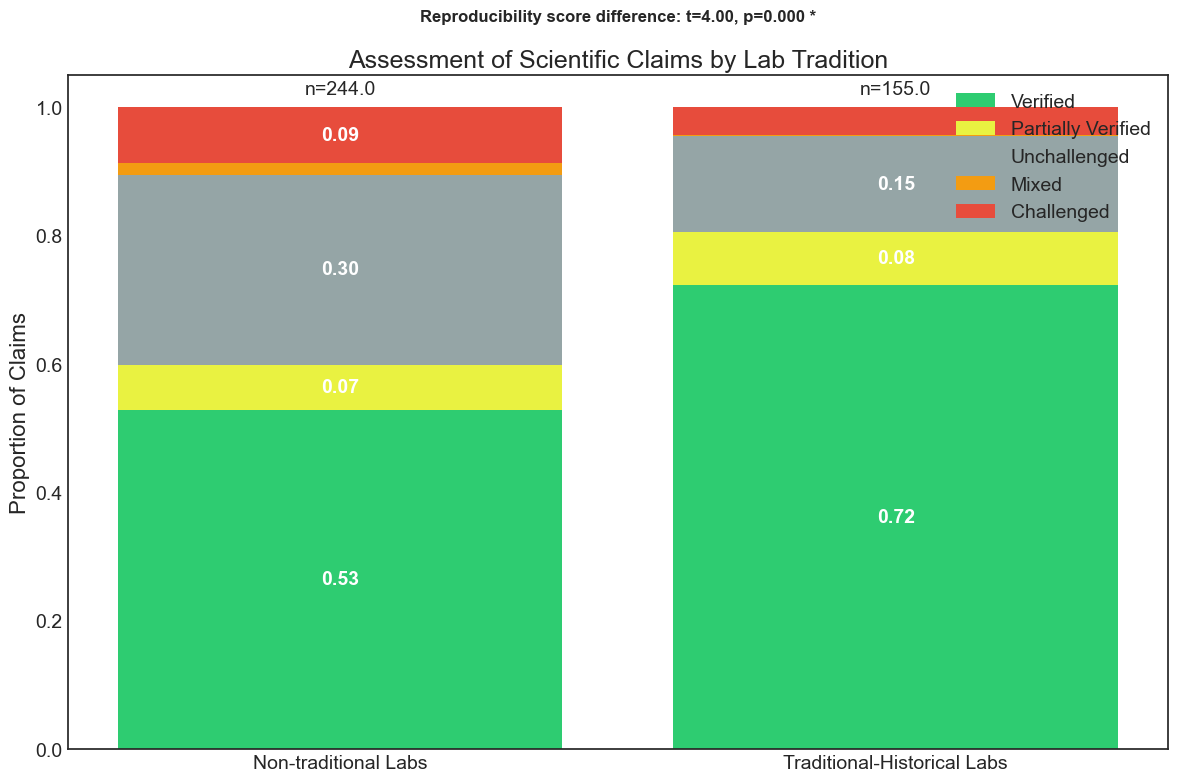

Summary of Traditional vs. Non-traditional Labs:
                Major claims  Articles  reproducibility_score  Verified_prop  \
Historical lab                                                                 
False                  603.0     244.0               0.972173       0.529022   
True                   402.0     155.0               1.427705       0.723881   

                Challenged_prop  Unchallenged_prop  
Historical lab                                      
False                  0.086235           0.296849  
True                   0.042289           0.149254  


In [23]:
# Create stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Prepare data for stacking
data = []
categories = []
for col in ['Verified_prop', 'Partially Verified_prop', 'Unchallenged_prop', 'Mixed_prop', 'Challenged_prop']:
    data.append(var_grouped[col].values)
    categories.append(col.replace('_prop', ''))

# Create stacked bars
x = np.arange(len(var_grouped.index))
bottom = np.zeros(len(var_grouped.index))
bars = []

for i, category in enumerate(categories):
    bar = ax.bar(x, data[i], bottom=bottom, label=category, 
                color=ASSESSMENT_COLORS[category])
    bottom += data[i]
    bars.append(bar)

# Add data labels to each segment
for bar in bars:
    for rect in bar:
        height = rect.get_height()
        if height > 0.05:  # Only add label if segment is large enough
            ax.text(rect.get_x() + rect.get_width()/2., rect.get_y() + height/2.,
                f'{height:.2f}', ha='center', va='center', color='white', fontweight='bold')

# Add number of papers as text on bars
for i, lab in enumerate(var_grouped.index):
    ax.text(i, 1.02, f"n={var_grouped.loc[lab, 'Articles']}", ha='center')

# Customize plot
ax.set_xticks(x)
ax.set_xticklabels(['Non-traditional Labs', 'Traditional-Historical Labs'])
ax.set_ylabel('Proportion of Claims')
ax.set_title('Assessment of Scientific Claims by Lab Tradition')
ax.legend(loc='upper right')

# Add statistical annotation
t_stat, p_val = stats.ttest_ind(
    df[df['Historical lab'] == True]['reproducibility_score'].dropna(),
    df[df['Historical lab'] == False]['reproducibility_score'].dropna(),
    equal_var=False
)

sign = "*" if p_val < 0.05 else "ns"
ax.text(0.5, 1.08, f"Reproducibility score difference: t={t_stat:.2f}, p={p_val:.3f} {sign}", 
      ha='center', transform=ax.transAxes, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary
print("Summary of Traditional vs. Non-traditional Labs:")
print(historical_grouped[['Major claims', 'Articles', 'reproducibility_score', 
                        'Verified_prop', 'Challenged_prop', 'Unchallenged_prop']])


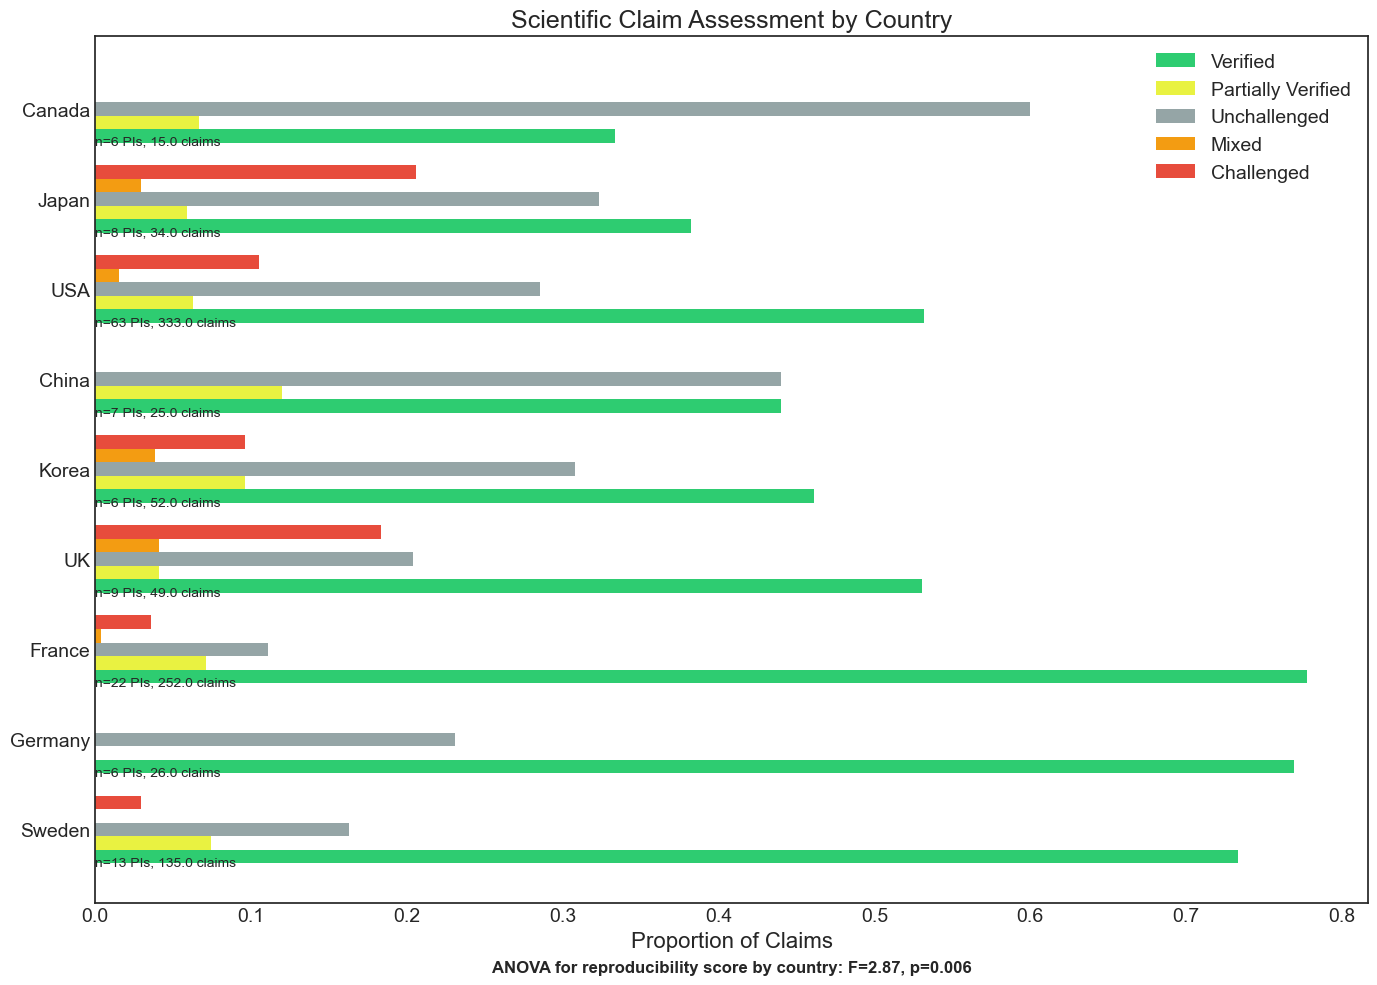

Country Rankings by Reproducibility Score:
    Country  Articles  Major claims  reproducibility_score  Verified_prop  \
15   Sweden        13         135.0               1.558907       0.733333   
6   Germany         6          26.0               1.541667       0.769231   
5    France        22         252.0               1.513596       0.777778   
17       UK         9          49.0               1.242761       0.530612   
12    Korea         6          52.0               1.099232       0.461538   
2     China         7          25.0               1.047619       0.440000   
18      USA        63         333.0               0.900827       0.531532   
11    Japan         8          34.0               0.538690       0.382353   
1    Canada         6          15.0               0.455556       0.333333   

    Challenged_prop  Unchallenged_prop  
15         0.029630           0.162963  
6          0.000000           0.230769  
5          0.035714           0.111111  
17         0.183673   

In [8]:
# Group by country and calculate proportions
country_grouped = df.groupby('Country').agg({
    **{col: 'sum' for col in assessment_columns},
    'Major claims': 'sum',
    'Articles': 'count',
    'reproducibility_score': 'mean'
}).reset_index()

# Calculate proportions
for col in assessment_columns:
    country_grouped[f'{col}_prop'] = country_grouped[col] / country_grouped['Major claims']

# Filter to include only countries with sufficient data (at least 5 PIs)
country_filtered = country_grouped[country_grouped['Articles'] >= 5]

# Sort by reproducibility score
country_filtered = country_filtered.sort_values('reproducibility_score', ascending=False)

# Create a horizontal grouped bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Set width and positions
width = 0.15
x = np.arange(len(country_filtered))

# Plot each assessment type
for i, category in enumerate(['Verified_prop', 'Partially Verified_prop', 'Unchallenged_prop', 
                             'Mixed_prop', 'Challenged_prop']):
    ax.barh(x + i*width - 0.3, country_filtered[category], width, 
           label=category.replace('_prop', ''),
           color=ASSESSMENT_COLORS[category.replace('_prop', '')])

# Customize plot
ax.set_yticks(x)
ax.set_yticklabels(country_filtered['Country'])
ax.set_xlabel('Proportion of Claims')
ax.set_title('Scientific Claim Assessment by Country')
ax.legend(loc='upper right')

# Add sample size annotation
for i, country in enumerate(country_filtered['Country']):
    ax.text(0, i - 0.4, f"n={country_filtered.iloc[i]['Articles']} PIs, {country_filtered.iloc[i]['Major claims']} claims", 
           fontsize=10)

# Add ANOVA results for reproducibility score differences by country
f_stat, p_val = stats.f_oneway(
    *[df[df['Country'] == country]['reproducibility_score'].dropna() 
     for country in country_filtered['Country']]
)

ax.text(0.5, -0.08, f"ANOVA for reproducibility score by country: F={f_stat:.2f}, p={p_val:.3f}", 
      ha='center', transform=ax.transAxes, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Print numerical summary
print("Country Rankings by Reproducibility Score:")
print(country_filtered[['Country', 'Articles', 'Major claims', 'reproducibility_score',
                       'Verified_prop', 'Challenged_prop', 'Unchallenged_prop']])


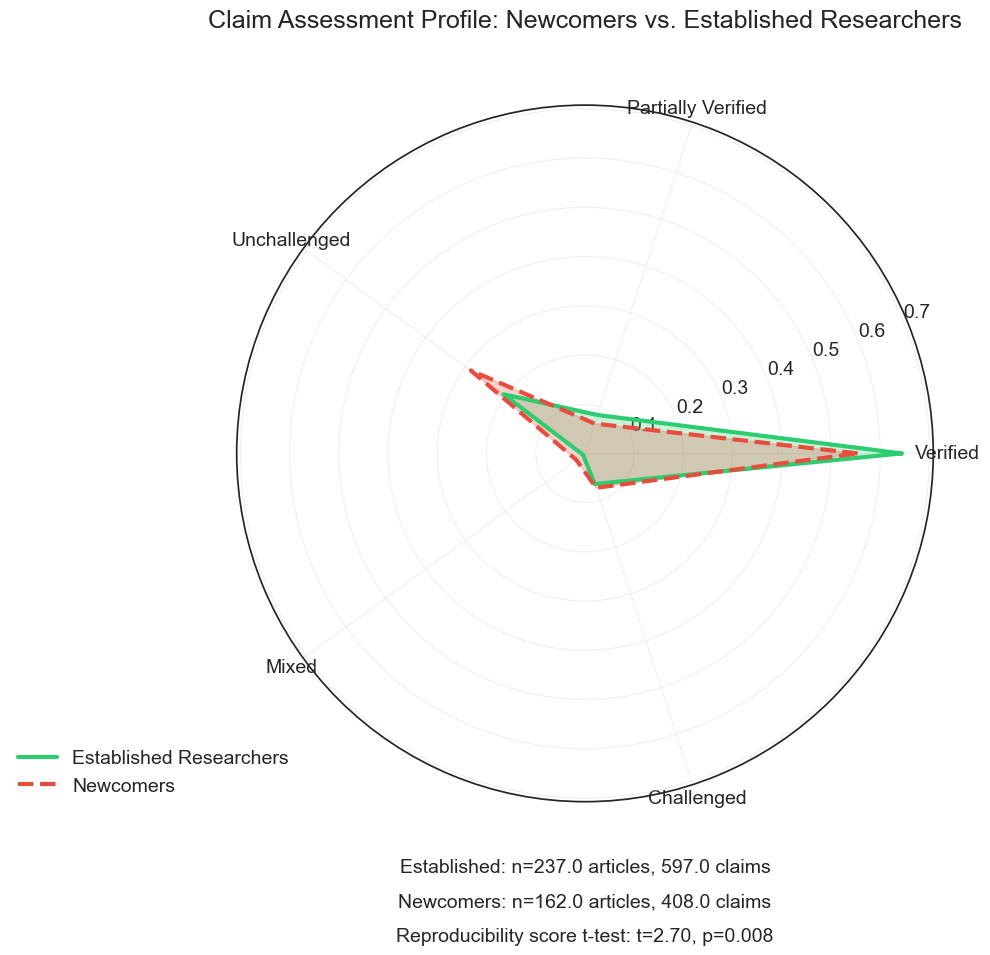

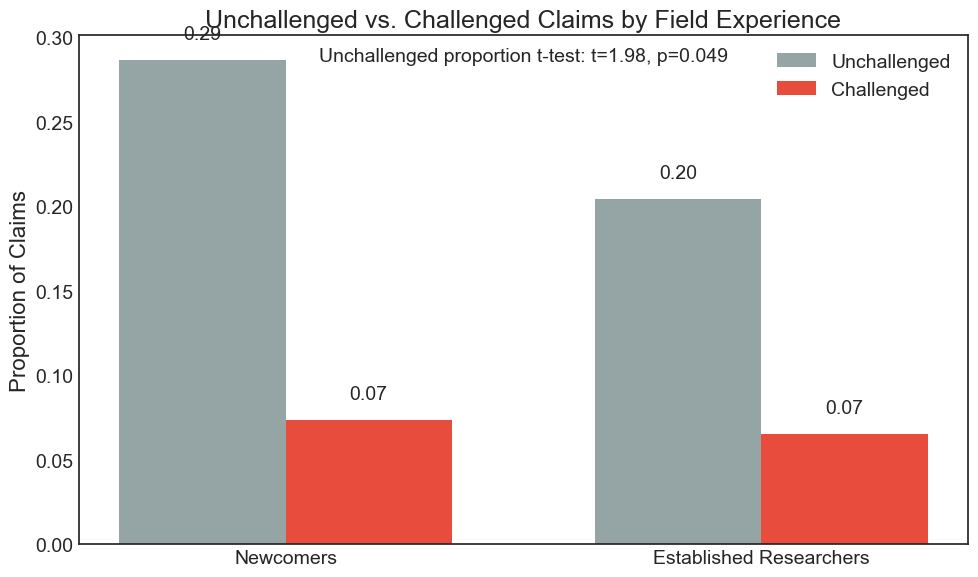

Summary of Newcomers vs. Established Researchers:
                         Major claims  Articles  reproducibility_score  \
Newcomers                       408.0     162.0               0.927128   
Established Researchers         597.0     237.0               1.294787   

                         Verified_prop  Challenged_prop  Unchallenged_prop  
Newcomers                     0.553922         0.073529           0.286765  
Established Researchers       0.643216         0.065327           0.204355  


In [9]:
# Group by continuity in the field
continuity_grouped = df.groupby('Continuity').agg({
    **{col: 'sum' for col in assessment_columns},
    'Major claims': 'sum',
    'Articles': 'sum',
    'reproducibility_score': 'mean'
})

# Calculate proportions
for col in assessment_columns:
    continuity_grouped[f'{col}_prop'] = continuity_grouped[col] / continuity_grouped['Major claims']

# Create a radar chart to compare the profiles
categories = ['Verified_prop', 'Partially Verified_prop', 'Unchallenged_prop', 
             'Mixed_prop', 'Challenged_prop']
categories_clean = [cat.replace('_prop', '') for cat in categories]

# Number of variables
N = len(categories)

# What will be the angle of each axis
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Draw one axis per variable + add labels
plt.xticks(angles[:-1], categories_clean, size=14)

# Draw the data for established researchers
values_true = continuity_grouped.loc[True, categories].values.flatten().tolist()
values_true += values_true[:1]  # Close the loop
ax.plot(angles, values_true, linewidth=3, linestyle='solid', 
       label='Established Researchers', color='#2ecc71')
ax.fill(angles, values_true, alpha=0.25, color='#2ecc71')

# Draw the data for newcomers
values_false = continuity_grouped.loc[False, categories].values.flatten().tolist()
values_false += values_false[:1]  # Close the loop
ax.plot(angles, values_false, linewidth=3, linestyle='dashed', 
       label='Newcomers', color='#e74c3c')
ax.fill(angles, values_false, alpha=0.25, color='#e74c3c')

# Add legend and title
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Claim Assessment Profile: Newcomers vs. Established Researchers', size=18, y=1.1)

# Customize radar chart
ax.set_ylim(0, max(max(values_true), max(values_false)) * 1.1)
ax.grid(True, alpha=0.3)

# Add sample size annotation
plt.annotate(f"Established: n={continuity_grouped.loc[True, 'Articles']} articles, {continuity_grouped.loc[True, 'Major claims']} claims", 
            xy=(0.5, -0.1), xycoords='axes fraction', ha='center')
plt.annotate(f"Newcomers: n={continuity_grouped.loc[False, 'Articles']} articles, {continuity_grouped.loc[False, 'Major claims']} claims", 
            xy=(0.5, -0.15), xycoords='axes fraction', ha='center')

# Add t-test results
t_stat, p_val = stats.ttest_ind(
    df[df['Continuity'] == True]['reproducibility_score'].dropna(),
    df[df['Continuity'] == False]['reproducibility_score'].dropna()
)
plt.annotate(f"Reproducibility score t-test: t={t_stat:.2f}, p={p_val:.3f}", 
            xy=(0.5, -0.2), xycoords='axes fraction', ha='center')

plt.tight_layout()
plt.show()

# Create a second visualization showing differences in unchallenged claims
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart for unchallenged claims
unchallenged_data = [continuity_grouped.loc[False, 'Unchallenged_prop'], 
                    continuity_grouped.loc[True, 'Unchallenged_prop']]
challenged_data = [continuity_grouped.loc[False, 'Challenged_prop'], 
                  continuity_grouped.loc[True, 'Challenged_prop']]

x = np.arange(2)
width = 0.35

unchallenged_bars = ax.bar(x - width/2, unchallenged_data, width, 
                         label='Unchallenged', color=ASSESSMENT_COLORS['Unchallenged'])
challenged_bars = ax.bar(x + width/2, challenged_data, width, 
                       label='Challenged', color=ASSESSMENT_COLORS['Challenged'])

# Add data labels
for bars in [unchallenged_bars, challenged_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
               f'{height:.2f}', ha='center', va='bottom')

# Customize plot
ax.set_xticks(x)
ax.set_xticklabels(['Newcomers', 'Established Researchers'])
ax.set_ylabel('Proportion of Claims')
ax.set_title('Unchallenged vs. Challenged Claims by Field Experience')
ax.legend()

# Add statistical annotation
t_stat_unch, p_val_unch = stats.ttest_ind(
    df[df['Continuity'] == False]['Unchallenged_prop'].dropna(),
    df[df['Continuity'] == True]['Unchallenged_prop'].dropna()
)
ax.text(0.5, 0.95, f"Unchallenged proportion t-test: t={t_stat_unch:.2f}, p={p_val_unch:.3f}", 
       ha='center', transform=ax.transAxes)

plt.tight_layout()
plt.show()

# Print summary
print("Summary of Newcomers vs. Established Researchers:")
continuity_summary = continuity_grouped.copy()
continuity_summary.index = ['Newcomers', 'Established Researchers']
print(continuity_summary[['Major claims', 'Articles', 'reproducibility_score', 
                         'Verified_prop', 'Challenged_prop', 'Unchallenged_prop']])


Data types before preprocessing:
Historical lab              bool
Continuity                  bool
Ivy league                 int64
Articles                 float64
Sex                       object
Unchallenged_prop        float64
Challenged_prop          float64
reproducibility_score    float64
dtype: object
Data types after preprocessing:
Historical lab             int64
Continuity                 int64
Ivy league                 int64
Articles                 float64
Unchallenged_prop        float64
Challenged_prop          float64
reproducibility_score    float64
dtype: object
X dtypes: [dtype('float64') dtype('int64')]
y dtype: float64
Model successfully fit!

Regression Model for Unchallenged Proportion:
                            OLS Regression Results                            
Dep. Variable:      Unchallenged_prop   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-s

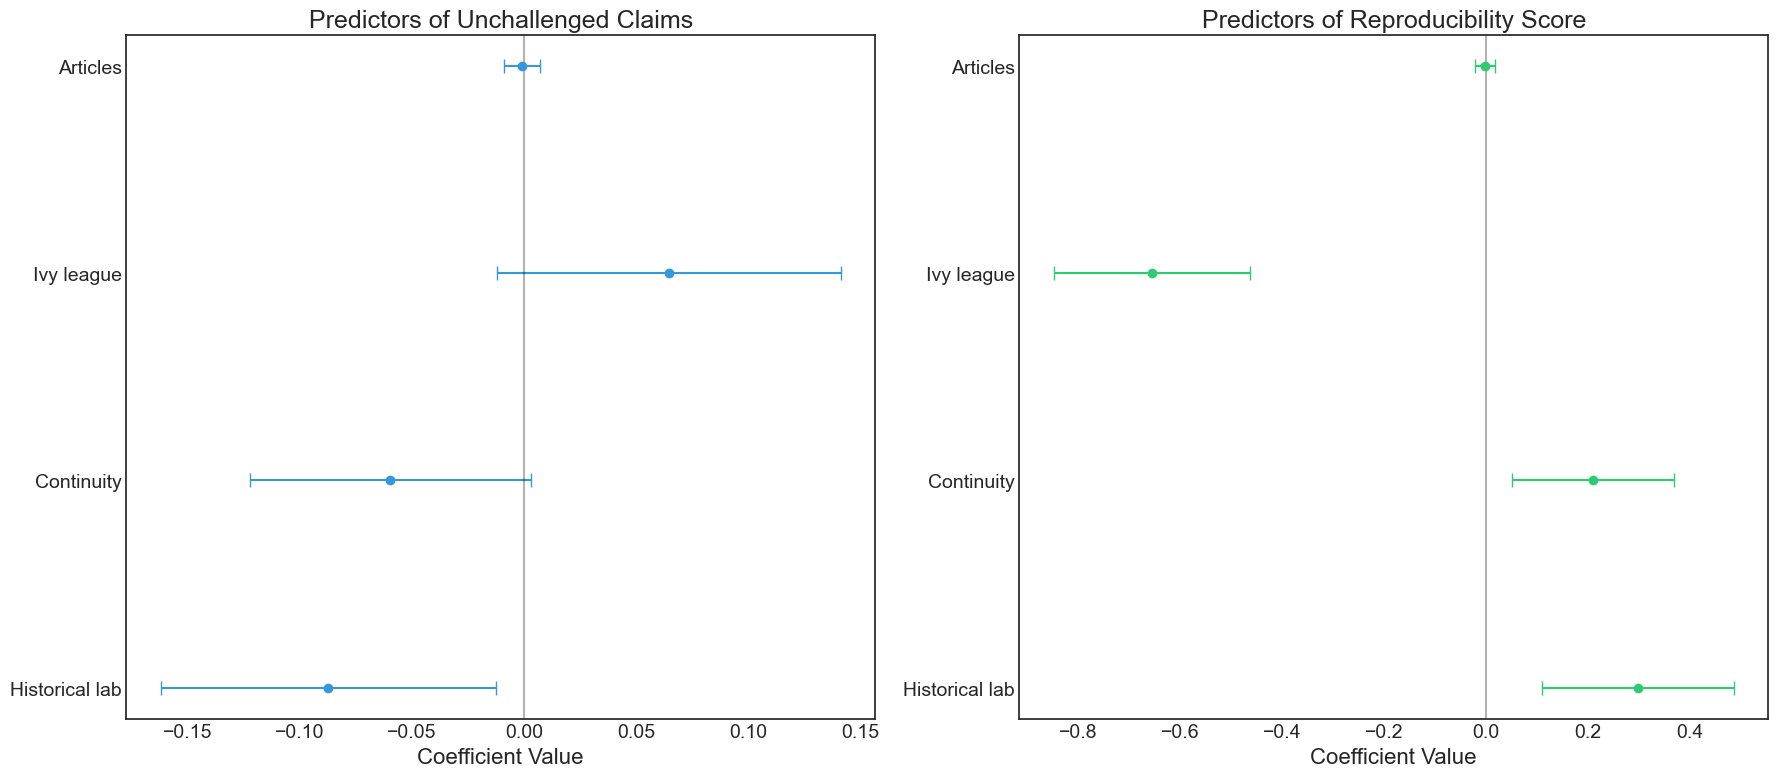

In [10]:
# Create a multivariable regression model to predict reproducibility
# First, ensure no object datatypes are in our dataset by examining the data
print("Data types before preprocessing:")
print(df[['Historical lab', 'Continuity', 'Ivy league', 'Articles', 
          'Sex', 'Unchallenged_prop', 'Challenged_prop', 'reproducibility_score']].dtypes)

# Convert any object columns to appropriate types
# Make sure all numeric columns are properly formatted
numeric_cols = ['Articles', 'Unchallenged_prop', 'Challenged_prop', 'reproducibility_score']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert boolean columns to integer
bool_cols = ['Historical lab', 'Continuity']
for col in bool_cols:
    df[col] = df[col].astype(int)
    
# Make sure categorical variables are properly typed
if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].astype('category')
    
# Create dummy variables properly
df_model = pd.get_dummies(df[['Historical lab', 'Continuity', 'Ivy league', 
                             'Articles', 'Unchallenged_prop', 'Challenged_prop', 
                             'reproducibility_score']])

# Print data types after preprocessing
print("Data types after preprocessing:")
print(df_model.dtypes)

# Fit regression model for unchallenged proportion
# Select predictors (X) and target (y)
y = df_model['Unchallenged_prop']
X = df_model.drop(['Unchallenged_prop', 'Challenged_prop', 'reproducibility_score'], axis=1)

# Add constant
X = sm.add_constant(X)

# Verify no object datatypes remain
print("X dtypes:", X.dtypes.unique())
print("y dtype:", y.dtype)

# Fit model
try:
    model_unchallenged = sm.OLS(y, X).fit()
    print("Model successfully fit!")
    
    # Create another model for reproducibility score
    y2 = df_model['reproducibility_score']
    model_repro = sm.OLS(y2, X).fit()
    
    # Print summaries
    print("\nRegression Model for Unchallenged Proportion:")
    print(model_unchallenged.summary())
    
    print("\nRegression Model for Reproducibility Score:")
    print(model_repro.summary())
    
    # Create a visual summary of the regression results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Extract coefficients and confidence intervals for unchallenged model
    coefs1 = model_unchallenged.params[1:]
    conf_intervals1 = model_unchallenged.conf_int().iloc[1:]
    errors1 = (conf_intervals1[1] - conf_intervals1[0]) / 3.92  # 95% CI to standard error
    
    # Plot coefficients for unchallenged model
    ax1.errorbar(coefs1, range(len(coefs1)), xerr=errors1, fmt='o', capsize=5, color='#3498db')
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    ax1.set_yticks(range(len(coefs1)))
    ax1.set_yticklabels(coefs1.index)
    ax1.set_xlabel('Coefficient Value')
    ax1.set_title('Predictors of Unchallenged Claims')
    
    # Extract coefficients and confidence intervals for reproducibility model
    coefs2 = model_repro.params[1:]
    conf_intervals2 = model_repro.conf_int().iloc[1:]
    errors2 = (conf_intervals2[1] - conf_intervals2[0]) / 3.92  # 95% CI to standard error
    
    # Plot coefficients for reproducibility model
    ax2.errorbar(coefs2, range(len(coefs2)), xerr=errors2, fmt='o', capsize=5, color='#2ecc71')
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    ax2.set_yticks(range(len(coefs2)))
    ax2.set_yticklabels(coefs2.index)
    ax2.set_xlabel('Coefficient Value')
    ax2.set_title('Predictors of Reproducibility Score')
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error fitting model: {e}")
    print("Let's try an alternative approach using a simpler model")
    
    # Create a simpler model with fewer variables
    basic_vars = ['Articles', 'Historical lab', 'Continuity']
    df_simple = df[basic_vars + ['Unchallenged_prop']].copy()
    
    for col in basic_vars + ['Unchallenged_prop']:
        df_simple[col] = pd.to_numeric(df_simple[col], errors='coerce')
    
    # Drop missing values
    df_simple = df_simple.dropna()
    
    # Run simpler regression
    X_simple = sm.add_constant(df_simple[basic_vars])
    y_simple = df_simple['Unchallenged_prop']
    
    model_simple = sm.OLS(y_simple, X_simple).fit()
    print("\nSimplified Regression Model:")
    print(model_simple.summary())



Summary Statistics:

Sex:
Female: Median challenged rate = 0.00%
Male: Median challenged rate = 0.00%
p-value = 0.740

Historical lab:
False: Median challenged rate = 0.00%
True: Median challenged rate = 0.00%
p-value = 0.355

Country:
USA: Median challenged rate = 0.00%
UK: Median challenged rate = 0.00%
Japan: Median challenged rate = 0.00%
Sweden: Median challenged rate = 0.00%
Korea: Median challenged rate = 0.00%
France: Median challenged rate = 0.00%
Greece: Median challenged rate = 0.00%
China: Median challenged rate = 0.00%
Czech Republic: Median challenged rate = 0.00%
Canada: Median challenged rate = 0.00%
Switzerland: Median challenged rate = 0.00%
Germany: Median challenged rate = 0.00%
Italy: Median challenged rate = 0.00%
Israel: Median challenged rate = 0.00%
Belgium: Median challenged rate = 0.00%
Spain: Median challenged rate = 0.00%
nan: Median challenged rate = 0.00%
Hungary: Median challenged rate = 0.00%
Finland: Median challenged rate = 0.00%
p-value = 0.736

Ivy

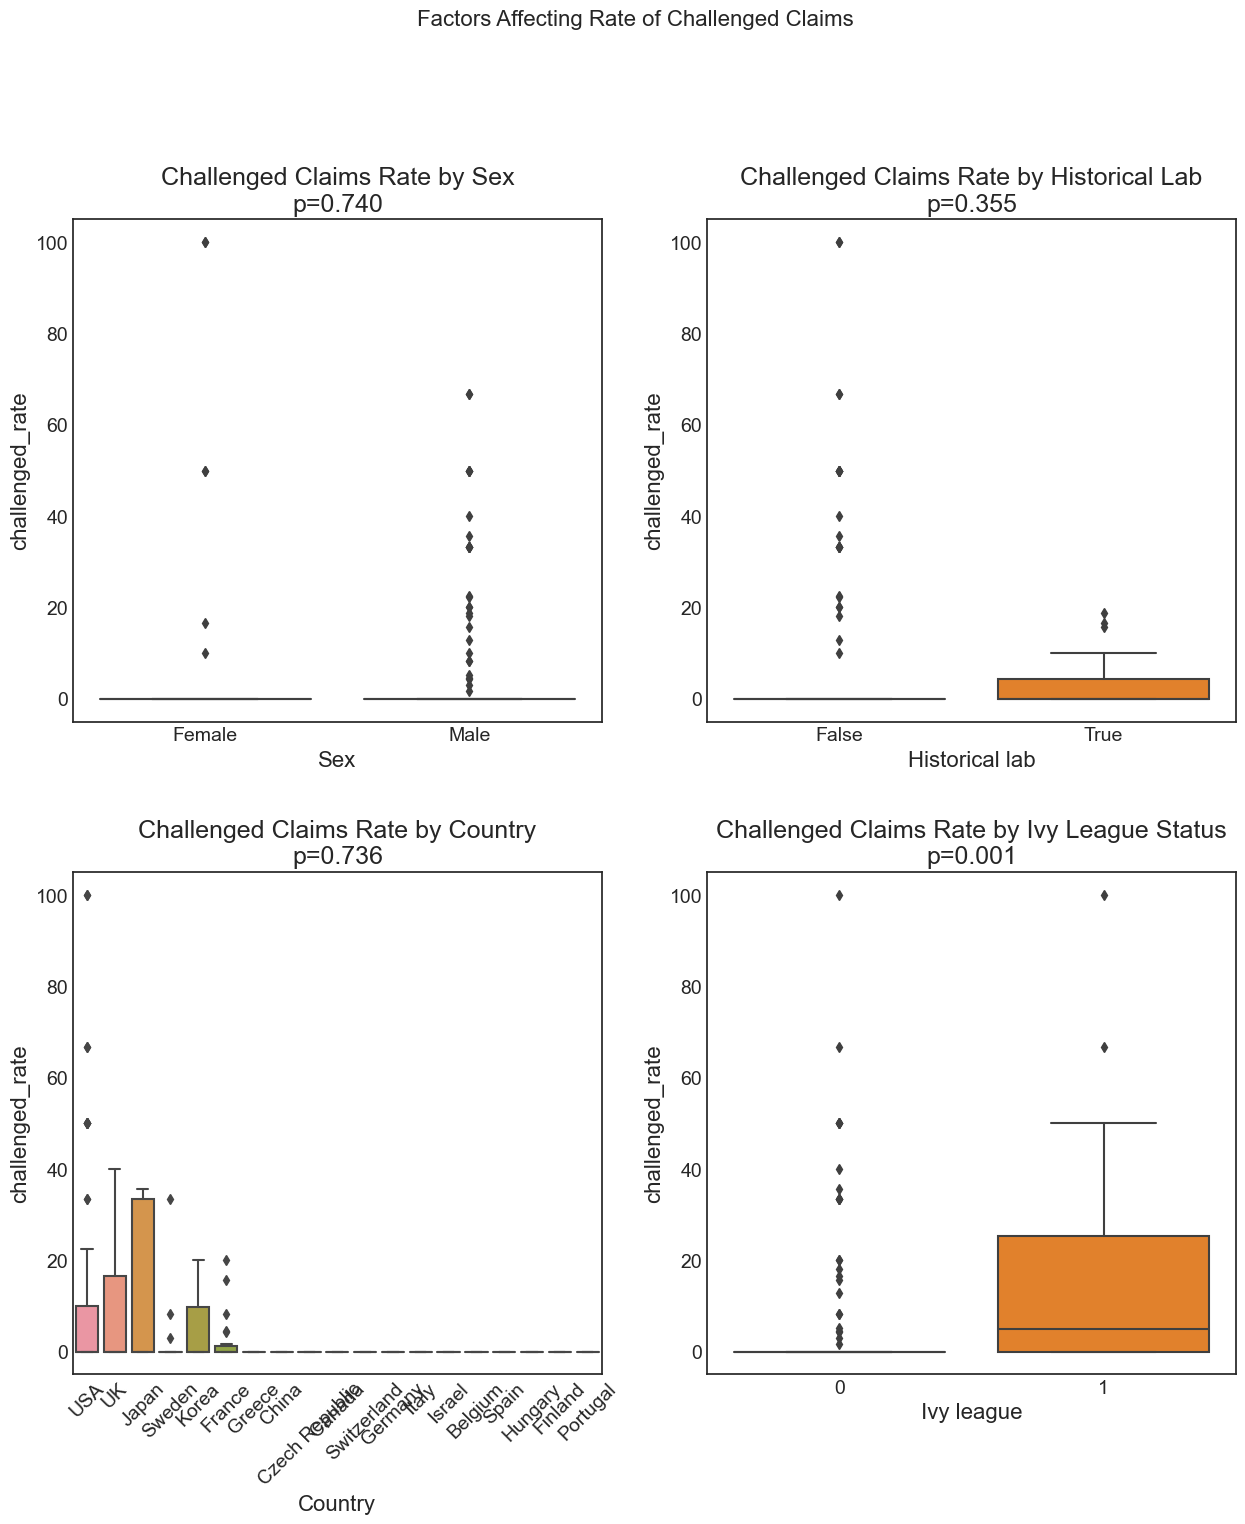

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Read the data


# Calculate percentage of challenged claims for each author
df['challenged_rate'] = df['Challenged'] / df['Major claims'] * 100

# Function for statistical testing
def compare_groups(data, column, rate_column='challenged_rate'):
    groups = data[column].unique()
    if len(groups) == 2:  # For binary variables like Sex
        group1 = data[data[column] == groups[0]][rate_column]
        group2 = data[data[column] == groups[1]][rate_column]
        stat, pval = stats.mannwhitneyu(group1, group2)
        return {
            'groups': groups,
            'medians': [group1.median(), group2.median()],
            'p_value': pval
        }
    else:  # For variables with more than 2 categories
        stat, pval = stats.kruskal(*[group[rate_column].values 
                                    for name, group in data.groupby(column)])
        return {
            'groups': groups,
            'medians': [group[rate_column].median() 
                       for name, group in data.groupby(column)],
            'p_value': pval
        }

# Create subplots for our analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.3)

# 1. Sex Analysis
sns.boxplot(data=df, x='Sex', y='challenged_rate', ax=axes[0,0])
sex_stats = compare_groups(df, 'Sex')
axes[0,0].set_title(f'Challenged Claims Rate by Sex\np={sex_stats["p_value"]:.3f}')

# 2. Historical Lab Analysis
sns.boxplot(data=df, x='Historical lab', y='challenged_rate', ax=axes[0,1])
lab_stats = compare_groups(df, 'Historical lab')
axes[0,1].set_title(f'Challenged Claims Rate by Historical Lab\np={lab_stats["p_value"]:.3f}')

# 3. Country Analysis
sns.boxplot(data=df, x='Country', y='challenged_rate', ax=axes[1,0])
country_stats = compare_groups(df, 'Country')
axes[1,0].set_title(f'Challenged Claims Rate by Country\np={country_stats["p_value"]:.3f}')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Ivy League vs Non-Ivy League
sns.boxplot(data=df, x='Ivy league', y='challenged_rate', ax=axes[1,1])
ivy_stats = compare_groups(df, 'Ivy league')
axes[1,1].set_title(f'Challenged Claims Rate by Ivy League Status\np={ivy_stats["p_value"]:.3f}')

# Add overall title
plt.suptitle('Factors Affecting Rate of Challenged Claims', fontsize=16, y=1.02)

# Print summary statistics
print("\nSummary Statistics:")
for factor in ['Sex', 'Historical lab', 'Country', 'Ivy league']:
    stats_result = compare_groups(df, factor)
    print(f"\n{factor}:")
    for group, median in zip(stats_result['groups'], stats_result['medians']):
        print(f"{group}: Median challenged rate = {median:.2f}%")
    print(f"p-value = {stats_result['p_value']:.3f}")

# Additional analysis for continuous relationships
if 'Continuity' in df.columns:
    correlation = stats.spearmanr(df['Continuity'], df['challenged_rate'])
    print("\nContinuity correlation:")
    print(f"Spearman correlation = {correlation.correlation:.3f}")
    print(f"p-value = {correlation.pvalue:.3f}")

# Save the figure
plt.savefig('challenged_claims_analysis.png', bbox_inches='tight', dpi=300)

# Create a summary table
summary_df = df.groupby(['Sex', 'Historical lab', 'Country']).agg({
    'challenged_rate': ['mean', 'median', 'std', 'count']
}).round(2)

print("\nDetailed Summary Table:")
print(summary_df)
